# Bugs

### 모듈 import

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd

### 멜론 url

In [2]:
url = 'https://music.bugs.co.kr/chart?wl_ref=M_left_02_01'

In [3]:
res = req.get(url)
res

<Response [200]>

### 텍스트 추출

- 각 순위별 title, singer 정보 수집하여 100위까지 뽑기

In [4]:
soup = bs(res.text, 'lxml')

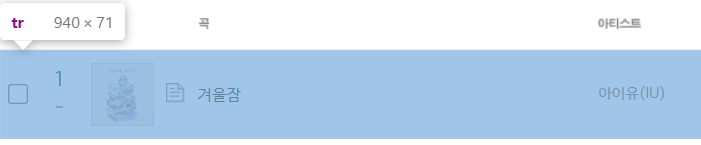

In [5]:
song_list = soup.select('tbody > tr')
song_list

[<tr albumid="4069567" artistid="80049126" multiartist="N" mvid="0" rowtype="track" trackid="6141498">
 <input name="_isStream" type="hidden" value="6141498"/>
 <input name="_isDown" type="hidden" value="6141498"/>
 <td class="check"><input buyminquality="T" disc_id="1" name="check" title="겨울잠" type="checkbox" value="6141498"/></td>
 <td>
 <div class="ranking">
 <strong>1</strong>
 <p class="change none"><em>0</em><span>변동없음</span></p>
 </div>
 </td>
 <td>
 <a class="thumbnail" href="https://music.bugs.co.kr/album/4069567?wl_ref=list_tr_07_chart" onclick="
 ">
 <span class="mask"></span>
 <img alt="조각집 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/40695/4069567.jpg?version=20211231095155.0"/>
 </a>
 </td>
 <td>
 <a class="trackInfo" href="https://music.bugs.co.kr/track/6141498?wl_ref=list_tr_08_chart" onclick="
 ">곡정보</a>
 </td>
 <th scope="row">
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclic

### 수집할 정보 선택

In [6]:
rank = soup.select('div.ranking > strong')
rank[0].text.strip()

'1'

In [7]:
title = soup.select('p.title > a')
title[0].text.strip()

'겨울잠'

In [8]:
# singer는 곡에 참여한 가수가 여러명일 경우 리스트 길이가 달라지므로 상위클래스까지만 선택
singer = soup.select('p.artist')
singer[0].text.strip()

'아이유(IU)'

In [9]:
rank_list = []
title_list = []
singer_list = []

for i in range(len(rank)):
    r = rank[i].text.strip()
    t = title[i].text.strip()
    s = singer[i].text.strip()
    
    rank_list.append(r)
    title_list.append(t)
    singer_list.append(s)

### 데이터 프레임 변환

In [10]:
info = {'순위' : rank_list, '곡' : title_list, '가수' : singer_list }

In [11]:
df = pd.DataFrame(info)

In [12]:
df

,순위,곡,가수
0,1,겨울잠,아이유(IU)
1,2,그대 손 놓아요,이선희
2,3,드라마,아이유(IU)
3,4,ELEVEN,IVE (아이브)
4,5,Dreams Come True,aespa
...,...,...,...
95,96,별의 조각,윤하(Younha/ユンナ)
96,97,"달 속엔 그대가 있나요, 그대 안엔 달이 있는데 (Moon inside Thee)",마크툽(MAKTUB)
97,98,I'm a 빛,화사(Hwa Sa)
98,99,Better,보아 (BoA)


### csv로 저장

In [36]:
df.to_csv('벅스 차트.csv', encoding = 'CP949', index = False)